In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [3]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jun18_nobias_ntuple/pn_kaonfilter_bias_1M_events_r0011_b238515.root")





In [4]:
hists = {}
hists["sim_kaone_hist"] = hist.Hist("Sim Kaons",      
                                hist.Bin("k", r"$K_s$ Kinetic Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    #constant definitions
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    pion_mass = 139
    kaon_mass = 497.648
 
    #select events
    sim_kaon = ldmx_events['Sim_Kaon']
    sim_kaon_n = ldmx_events['n']
    
    kshort_mask = (abs(sim_kaon.pdgID) == kshort_pdgid)
    n_mask1 = (abs(flat(sim_kaon_n)) == 1)
    n_mask2 = (abs(flat(sim_kaon_n)) == 2)
    hists["sim_kaone_hist"].fill(
                                     k= flat(sim_kaon[kshort_mask].e) - kaon_mass,
                                     e= flat(sim_kaon[kshort_mask].electrone),
                                     )
    return

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    print('process', nchunk)
    ProcessChunk(chunk, hists)

process 1


<Hist (k,e) instance at 0x10e5ae100>


Text(2900, 1370, 'All n')

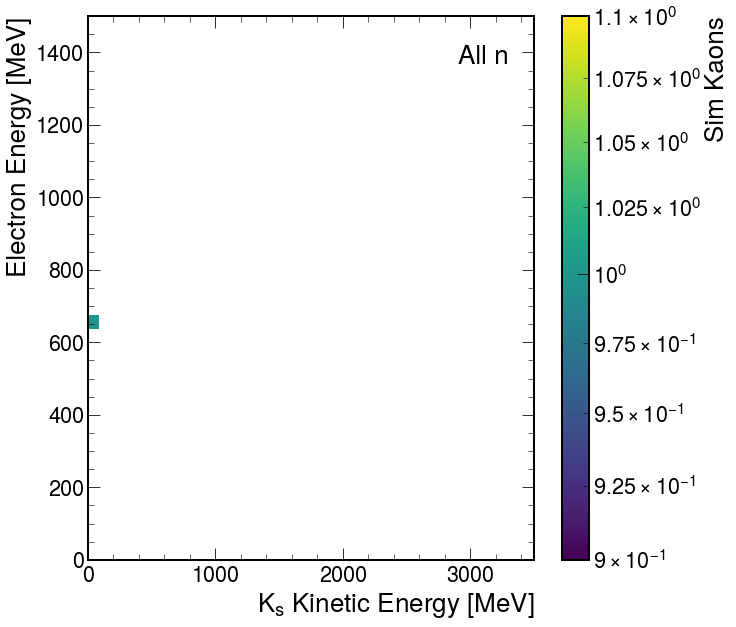

In [7]:
print(hists["sim_kaone_hist"])

fig, ax = plt.subplots()
hist.plot2d(hists["sim_kaone_hist"], xaxis='k', ax=ax,patch_opts=POPTS);
ax.text(2900, 1370,r'All n')


